In [11]:
#Packages
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func
from PIL import Image

mkdir: cannot create directory ‘tmp/’: File exists


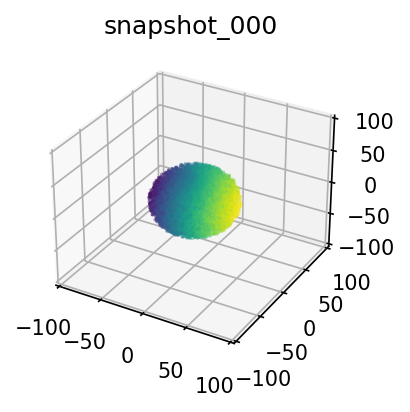

NameError: name 'view_init' is not defined

In [18]:
#Directory with data:
dirr = "project1/rotation"
datadir = dirr + "/n10000/"

#Creating folders for the output image.
dirname = 'tmp/'
!mkdir $dirname
exist = os.path.exists(dirname)
if exist=="False":
    os.mkdir(dirname)
else:
    os.remove

files = os.listdir(datadir+".")
files.sort()
for i,file in enumerate(files):    #Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
    f = h5py.File(datadir+file, "r")
    group = f["PartType1"]
    data = group["Coordinates"][()]
    vel = group["Velocities"][()]
    
    #Plotting the initial conditions of both galaxies:
    fig = plt.figure(dpi=150)
    
    ax1 = fig.add_subplot(1,2,1,projection='3d')
    plot = ax1.scatter3D(data[:,0],data[:,1],data[:,2],'k.',s=0.2,c=vel[:,0],cmap="viridis",alpha=0.5)
    cbar = fig.colorbar(plot, ax = ax)
    cbar.set_label('Vx', rotation=0)
    ax1.set_xlim(-100,100)
    ax1.set_ylim(-100,100)
    ax1.set_zlim(-100,100)
    cbar.set_alpha(1)
    plt.title(file[:-5])
    plt.savefig(dirname+str(i)+".png", bbox_inches = 'tight')
    plt.show()
    
    ax2 = fig.add_subplot(1,2,2,projection='3d')
    plot = ax2.scatter3D(data[:,0],data[:,1],data[:,2],'k.',s=0.2,c=vel[:,0],cmap="viridis",alpha=0.5)
    ax2 = view_init(90,0)
    cbar = fig.colorbar(plot, ax = ax)
    cbar.set_label('Vx', rotation=0)
    ax2.set_xlim(-100,100)
    ax2.set_ylim(-100,100)
    ax2.set_zlim(-100,100)
    cbar.set_alpha(1)
    plt.title(file[:-5])
    plt.savefig(dirname+str(i)+".png", bbox_inches = 'tight')
    plt.show()


In [13]:
#ANIMATION:
im1 = Image.open('tmp/0.png')
images = []

for k in range(1, 28):
    path = "tmp/" + str(k) + ".png"
    images.append(Image.open(path))

im1.save(dirr+"/n10000.gif", save_all=True, append_images=images, duration=200, loop=2)
!rm -r tmp/

In [6]:
file

0

In [9]:
exist

False

In [14]:
len(file)

17